In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import numpy as np

import random

def draw_token_series_rss(n: int, bins: int=100):
    
    """
    Given a total count N and a bin size, randomly draw a series
    and calculate the RSS against the uniform.
    """
    
    expected = np.full(bins, n/bins)
    
    observed = np.zeros(bins)
    
    for _ in range(n):
        observed[random.randint(0, bins-1)] += 1
        
    return np.sum((expected-observed)**2)

In [47]:
def draw_rss_std(n: int, samples: int=10000):
    
    return np.std([
        draw_token_series_rss(n)
        for _ in range(samples)
    ])

In [ ]:
data = [
    (n, draw_rss_std(n))
    for n in range(0, 1000, 100)
]

In [49]:
import pandas as pd

df = pd.DataFrame(data, columns=('n', 'std'))

In [51]:
from patsy import dmatrices

y, x = dmatrices(
    'std ~ n',
    data=df,
    return_type='dataframe',
)

In [52]:
import statsmodels.api as sm

mod = sm.OLS(y, x)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    std   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.709e+05
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           1.31e-18
Time:                        23:52:58   Log-Likelihood:                -1.3453
No. Observations:                  10   AIC:                             6.691
Df Residuals:                       8   BIC:                             7.296
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1322      0.182     -0.727      0.488        -0.552     0.287
n              0.1409      0.000    413.422      0.000         0.140     0.142
==============================================================================
Omnibus:                        5.356   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                2.298
Skew:                          -1.164   Prob(JB):                        0.317
Kurtosis:                       3.316   Cond. No.                         992.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

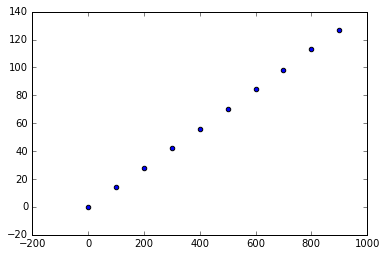

In [53]:
plt.scatter(df['n'], df['std'])

In [68]:
res.params

Intercept   -0.132250
n            0.140868
dtype: float64

In [67]:
data

[(0, 0.0),
 (100, 14.02209022364355),
 (200, 28.227132189437874),
 (300, 42.276771766538658),
 (400, 55.571798770239567),
 (500, 70.104313680685863),
 (600, 84.504359025082252),
 (700, 98.177131372025727),
 (800, 112.88937743454872),
 (900, 126.80883471998314)]

In [72]:
-0.132250 + (0.140868 * 600)

84.38855

- get a token series
- get RSS of series against expected
- zscore = RSS / (total count * 0.14)
- sort by zscore